In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/transactions-data/Transactions_data/transaction_data.csv
/kaggle/input/transactions-data/Transactions_data/purchase_behaviour.csv


## Trought this task we need to identify the most profitable customers from the purchase data and transaction data also identify the best selling products


## Import the data and perform EDA on the data

In [2]:
## import the data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
transactions=pd.read_csv(r"/kaggle/input/transactions-data/Transactions_data/transaction_data.csv")
purchase=pd.read_csv(r"/kaggle/input/transactions-data/Transactions_data/purchase_behaviour.csv")
print(transactions.head())
print(purchase.head())

    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8  
   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILIES           Budget
3            1004  

In [3]:
## Check the null values in the data
print(transactions.isnull().sum())
print(purchase.isnull().sum())

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64
LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


In [4]:
## Check the data types and null values in the data
transactions.info()
purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
m

In [5]:
## Check the shapes of the files
print(transactions.shape)
print(purchase.shape)

(264836, 8)
(72637, 3)


In [6]:
## Describe the dataset into the diffrent numerical form for analysis
print(transactions.describe())
print(purchase.describe())

                DATE     STORE_NBR  LYLTY_CARD_NBR        TXN_ID  \
count  264836.000000  264836.00000    2.648360e+05  2.648360e+05   
mean    43464.036260     135.08011    1.355495e+05  1.351583e+05   
std       105.389282      76.78418    8.057998e+04  7.813303e+04   
min     43282.000000       1.00000    1.000000e+03  1.000000e+00   
25%     43373.000000      70.00000    7.002100e+04  6.760150e+04   
50%     43464.000000     130.00000    1.303575e+05  1.351375e+05   
75%     43555.000000     203.00000    2.030942e+05  2.027012e+05   
max     43646.000000     272.00000    2.373711e+06  2.415841e+06   

            PROD_NBR       PROD_QTY      TOT_SALES  
count  264836.000000  264836.000000  264836.000000  
mean       56.583157       1.907309       7.304200  
std        32.826638       0.643654       3.083226  
min         1.000000       1.000000       1.500000  
25%        28.000000       2.000000       5.400000  
50%        56.000000       2.000000       7.400000  
75%        85.00

In [7]:
## CHeck the columns in the csv files
print(transactions.columns.tolist())
print(purchase.columns.tolist())

['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR', 'PROD_NAME', 'PROD_QTY', 'TOT_SALES']
['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER']


In [8]:
## Convert the data into dataframe for ease of use
df1=pd.DataFrame(transactions)
df2=pd.DataFrame(purchase)

                LIFESTAGE  TOT_SALES
3   OLDER SINGLES/COUPLES  402426.75
4                RETIREES  366470.90
2          OLDER FAMILIES  353767.20
5          YOUNG FAMILIES  316160.10
6   YOUNG SINGLES/COUPLES  260405.30
0  MIDAGE SINGLES/COUPLES  184751.30
1            NEW FAMILIES   50433.45


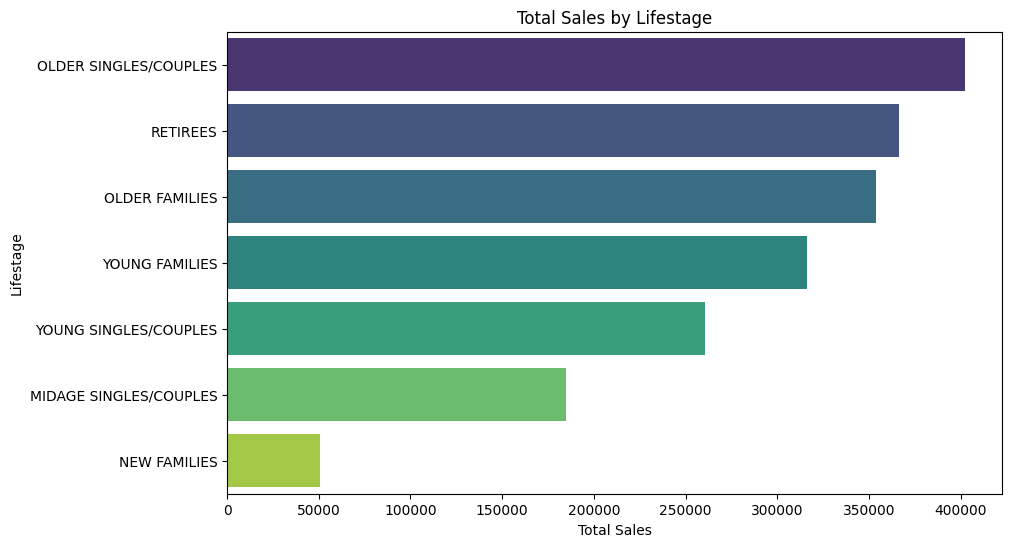

In [9]:
# Aggregate total sales per customer
customer_sales = df1.groupby('LYLTY_CARD_NBR')['TOT_SALES'].sum().reset_index()

# Merge with customer characteristics
merged_df = pd.merge(df1,df2, on='LYLTY_CARD_NBR')

# Aggregate total sales by LIFESTAGE
lifestage_sales = merged_df.groupby('LIFESTAGE')['TOT_SALES'].sum().reset_index()

# Sort by total sales to find the most profitable lifestage
most_profitable_lifestage = lifestage_sales.sort_values(by='TOT_SALES', ascending=False)

# Display the most profitable lifestage
print(most_profitable_lifestage)

# Plot total sales by LIFESTAGE
plt.figure(figsize=(10, 6))
sns.barplot(x='TOT_SALES', y='LIFESTAGE', data=most_profitable_lifestage, palette='viridis')
plt.title('Total Sales by Lifestage')
plt.xlabel('Total Sales')
plt.ylabel('Lifestage')
plt.show()

  PREMIUM_CUSTOMER  TOT_SALES
1       Mainstream  750744.50
0           Budget  676211.55
2          Premium  507458.95


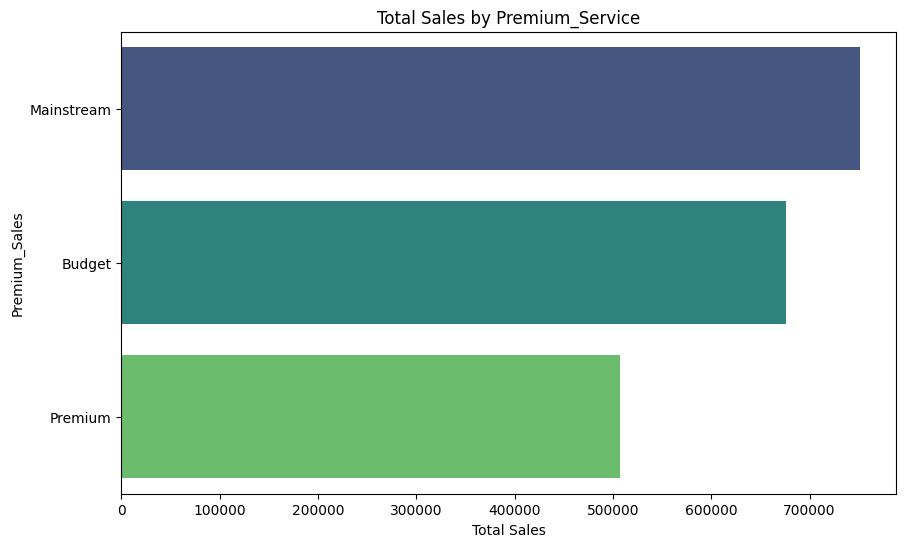

In [10]:
## Sales according the premium_service
premium_sales_df=merged_df.groupby("PREMIUM_CUSTOMER")["TOT_SALES"].sum().reset_index()
most_premium_sales=premium_sales_df.sort_values(by="TOT_SALES",ascending=False)
print(most_premium_sales)

# Plot total sales by premium_service
plt.figure(figsize=(10, 6))
sns.barplot(x='TOT_SALES', y='PREMIUM_CUSTOMER', data=most_premium_sales, palette='viridis')
plt.title('Total Sales by Premium_Service')
plt.xlabel('Total Sales')
plt.ylabel('Premium_Sales')
plt.show()

PREMIUM_CUSTOMER        Budget  Mainstream  Premium
LIFESTAGE                                          
OLDER FAMILIES           23160       14244    11192
YOUNG FAMILIES           19122       12907    11563
OLDER SINGLES/COUPLES    18407       18318    17754
RETIREES                 15201       21466    13096
YOUNG SINGLES/COUPLES     9242       20854     6281
MIDAGE SINGLES/COUPLES    5020       11874     8216
NEW FAMILIES              3005        2325     1589


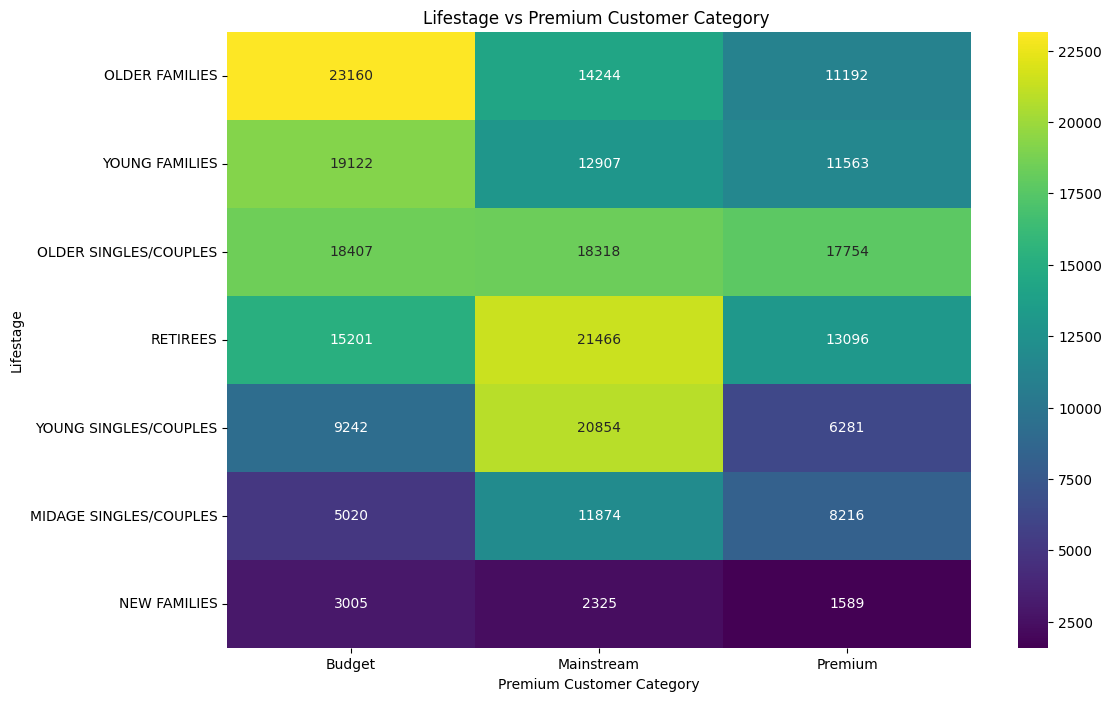

In [11]:
lifestage_premium_crosstab = pd.crosstab(merged_df['LIFESTAGE'], merged_df['PREMIUM_CUSTOMER'])

# Sort the cross-tabulation by the total count across rows
lifestage_premium_sorted = lifestage_premium_crosstab.sort_values(by=lifestage_premium_crosstab.columns.tolist(), ascending=False, axis=0)

# Display the sorted cross-tabulation
print(lifestage_premium_sorted)

# Plot the sorted cross-tabulation
plt.figure(figsize=(12, 8))
sns.heatmap(lifestage_premium_sorted, annot=True, fmt='d', cmap='viridis')
plt.title('Lifestage vs Premium Customer Category ')
plt.xlabel('Premium Customer Category')
plt.ylabel('Lifestage')
plt.show()

Top 3 Most Profitable Products:
                                   PROD_NAME  TOT_SALES
11          Dorito Corn Chp     Supreme 380g    40352.0
86    Smiths Crnkle Chip  Orgnl Big Bag 380g    36367.6
77  Smiths Crinkle Chips Salt & Vinegar 330g    34804.2


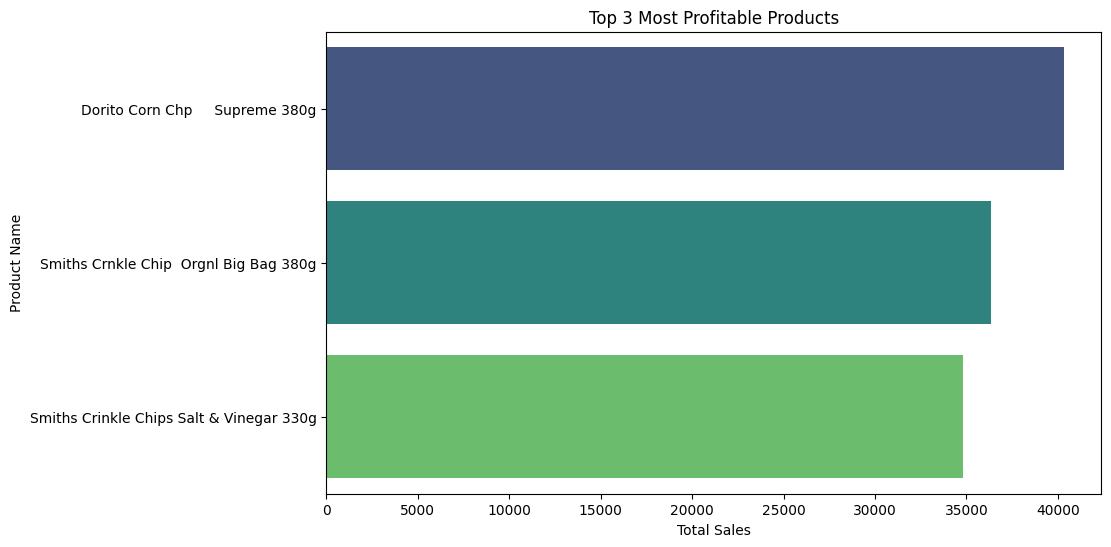

In [12]:
# Identify top 3 most profitable products
product_sales = df1.groupby('PROD_NAME')['TOT_SALES'].sum().reset_index()
top_products = product_sales.sort_values(by='TOT_SALES', ascending=False).head(3)
print("Top 3 Most Profitable Products:")
print(top_products)

# Plot top 3 products
plt.figure(figsize=(10, 6))
sns.barplot(x='TOT_SALES', y='PROD_NAME', data=top_products, palette='viridis')
plt.title('Top 3 Most Profitable Products')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.show()

Characteristics of Most Loyal Customers:
   LYLTY_CARD_NBR  TXN_ID              LIFESTAGE PREMIUM_CUSTOMER
0          162039      18         OLDER FAMILIES       Mainstream
1          172032      18  YOUNG SINGLES/COUPLES       Mainstream
2           13138      17         YOUNG FAMILIES       Mainstream
3          116181      17         YOUNG FAMILIES          Premium
4          128178      17         OLDER FAMILIES       Mainstream


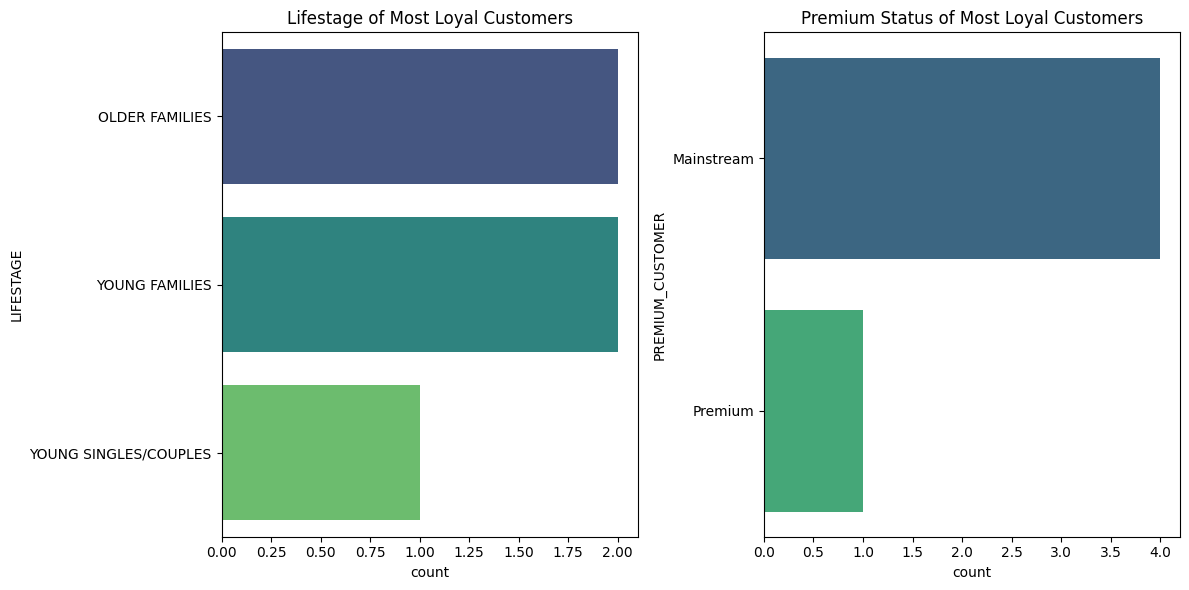

In [13]:
# Identify most loyal customers (e.g., based on number of transactions)
customer_loyalty = df1.groupby('LYLTY_CARD_NBR')['TXN_ID'].count().reset_index()
most_loyal_customers = customer_loyalty.sort_values(by='TXN_ID', ascending=False).head(5)

# Merge with customer characteristics
loyal_customer_details = pd.merge(most_loyal_customers, df2, on='LYLTY_CARD_NBR')
print("Characteristics of Most Loyal Customers:")
print(loyal_customer_details)

# Plot characteristics of most loyal customers
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(y='LIFESTAGE', data=loyal_customer_details, order=loyal_customer_details['LIFESTAGE'].value_counts().index, palette='viridis')
plt.title('Lifestage of Most Loyal Customers')

plt.subplot(1, 2, 2)
sns.countplot(y='PREMIUM_CUSTOMER', data=loyal_customer_details, order=loyal_customer_details['PREMIUM_CUSTOMER'].value_counts().index, palette='viridis')
plt.title('Premium Status of Most Loyal Customers')

plt.tight_layout()
plt.show()

## Hypothesis on Loyal Customer Preferences
An investigation into loyal consumer behavior needs careful examination of elements which affect their purchase decisions. Multiple explanations exist for why customers demonstrate greater loyalty which include the following points:

Product Quality and Variety:

Customizations made to high-quality products and extensive variety serve as critical factors for winning the loyalty of such customers.

Customer Service:

The delivery of outstanding customer service produces satisfied clients who remain dependable customers.

Brand Affinity:

A robust affinity for the brand exists among customers because of how it presents itself to the public.

Personalization and Rewards:

Repeat purchases become more likely when customers receive deals that fit their preferences followed by loyalty benefits.

Convenience:

Regular accessibility to products regardless of their place or availability online will encourage customer loyalty.

Emotional Connection:

Nostalgic feelings or community networks tied to a brand build customer commitment.